In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def mandelbrot_fractal(pmin, pmax, ppoints, qmin, qmax, qpoints, degree=None,
               max_iterations=200, infinity_border=4, func=None):
    image = np.zeros((ppoints, qpoints))
    p, q = np.mgrid[pmin:pmax:(ppoints*1j), qmin:qmax:(qpoints*1j)]
    c = p + 1j*q
    z = np.zeros_like(c)
    for k in range(max_iterations):
        if func is not None:
            z = func(z) + c
        else:
            z = z**degree + c
        mask = (np.abs(z) > infinity_border) & (image == 0)
        image[mask] = k
        z[mask] = np.nan
        np.warnings.filterwarnings('ignore')
    return -image.T

In [3]:
def julia_fractal(pmin, pmax, ppoints, qmin, qmax, qpoints, degree, re=None, im=None,
                  max_iterations=1000, infinity_border=4):
    image = np.zeros((ppoints, qpoints))

    for i, p in enumerate(np.linspace(pmin, pmax, ppoints)):
        for j, q in enumerate(np.linspace(qmin, qmax, qpoints)):
            if re is None and im is None:
                c = np.random.random_sample() + 1j * np.random.random_sample()
            elif re is None and im is not None:
                c = np.random.random_sample() + 1j * im
            elif im is None and re is not None:
                c = re + 1j * np.random.random_sample()
            else:
                c = re + 1j * im

            z = math.asinh(p) + 1j * math.asinh(q)
            for k in range(max_iterations):
                z = z ** degree + c

                if abs(z) > infinity_border:
                    image[i][j] = k
                    break
                    
    return -image.T

In [4]:
def plot_fractal(image):
    fig, ax = plt.subplots(2, 2, figsize=(15, 15))
    k = 2
    for i in range(2):
        for j in range(2):
            ax[i][j].set_title("degree = "+str(k), color="red", fontsize=16)
            ax[i][j].set_xticks([])
            ax[i][j].set_yticks([])
            ax[i][j].imshow(image[i][j], cmap='flag', interpolation='none')
            k += 1
    
    plt.show()

# Фрактали Мандельброта для степенів = 2 ... 5

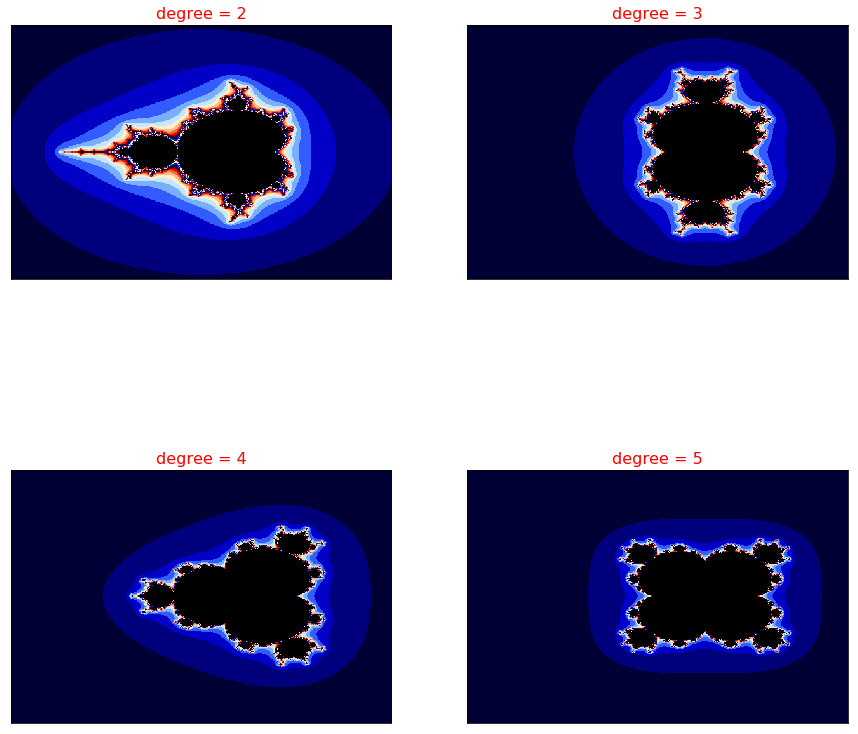

In [5]:
image = []
for i in range(2, 6):
    image.append([mandelbrot_fractal(-2.5, 1.5, 600, -2, 2, 400, degree=i)])
    
image = np.array(image).reshape((2,2,400,600))
plot_fractal(image)

# Фрактал Мандельброта для функції Cos(z)

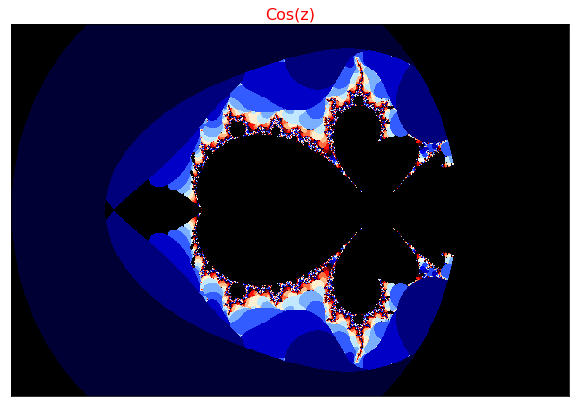

In [6]:
plt.figure(figsize=(10, 10))
image = mandelbrot_fractal(-5, 5, 600, -3, 3, 400, func=np.cos)
plt.title("Cos(z)", color="red", fontsize=16)
plt.xticks([])
plt.yticks([])
plt.imshow(image, cmap='flag', interpolation='none')
plt.show()

# Фрактал Мандельброта для функції Sin(z)

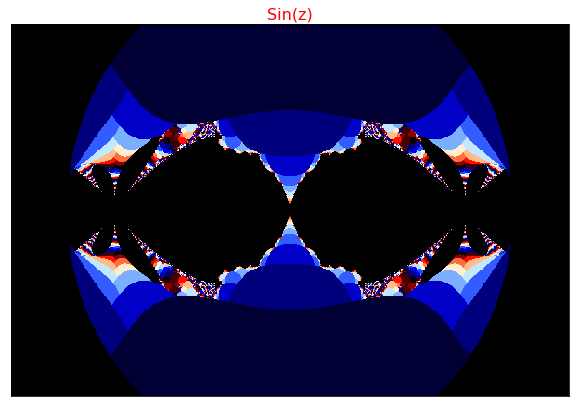

In [7]:
plt.figure(figsize=(10, 10))
image = mandelbrot_fractal(-5, 5, 600, -3, 3, 400, func=np.sin)
plt.title("Sin(z)", color="red", fontsize=16)
plt.xticks([])
plt.yticks([])
plt.imshow(image, cmap='flag', interpolation='none')
plt.show()

# Фрактали Жюліа

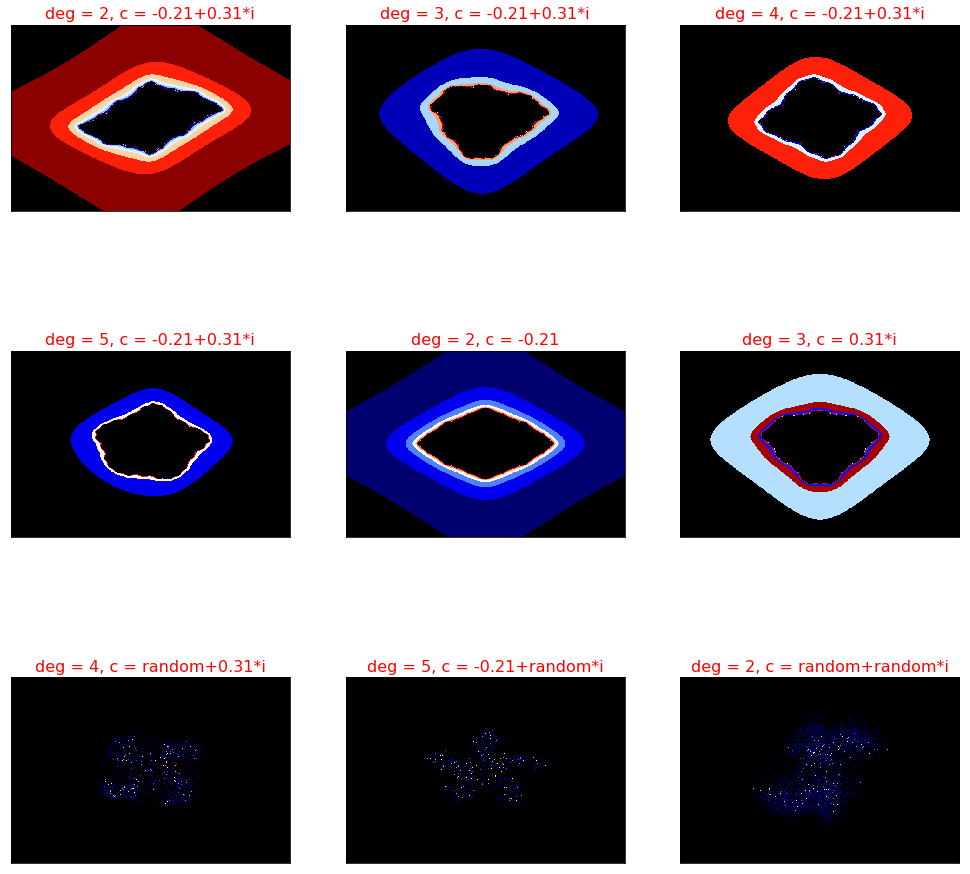

In [8]:
fig, ax = plt.subplots(3, 3, figsize=(17, 17))

image = julia_fractal(-3, 3, 600, -3, 3, 400, degree=2, re=-0.21, im=0.31)
ax[0][0].set_title("deg = 2, c = -0.21+0.31*i", color="red", fontsize=16)
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])
ax[0][0].imshow(image, cmap='flag', interpolation='none')

image = julia_fractal(-3, 3, 600, -3, 3, 400, degree=3, re=-0.21, im=0.31)
ax[0][1].set_title("deg = 3, c = -0.21+0.31*i", color="red", fontsize=16)
ax[0][1].set_xticks([])
ax[0][1].set_yticks([])
ax[0][1].imshow(image, cmap='flag', interpolation='none')

image = julia_fractal(-3, 3, 600, -3, 3, 400, degree=4, re=-0.21, im=0.31)
ax[0][2].set_title("deg = 4, c = -0.21+0.31*i", color="red", fontsize=16)
ax[0][2].set_xticks([])
ax[0][2].set_yticks([])
ax[0][2].imshow(image, cmap='flag', interpolation='none')

image = julia_fractal(-3, 3, 600, -3, 3, 400, degree=5, re=-0.21, im=0.31)
ax[1][0].set_title("deg = 5, c = -0.21+0.31*i", color="red", fontsize=16)
ax[1][0].set_xticks([])
ax[1][0].set_yticks([])
ax[1][0].imshow(image, cmap='flag', interpolation='none')

image = julia_fractal(-3, 3, 600, -3, 3, 400, degree=2, re=-0.21, im=0)
ax[1][1].set_title("deg = 2, c = -0.21", color="red", fontsize=16)
ax[1][1].set_xticks([])
ax[1][1].set_yticks([])
ax[1][1].imshow(image, cmap='flag', interpolation='none')

image = julia_fractal(-3, 3, 600, -3, 3, 400, degree=3, re=0, im=0.31)
ax[1][2].set_title("deg = 3, c = 0.31*i", color="red", fontsize=16)
ax[1][2].set_xticks([])
ax[1][2].set_yticks([])
ax[1][2].imshow(image, cmap='flag', interpolation='none')

image = julia_fractal(-3, 3, 600, -3, 3, 400, degree=4, im=0.31)
ax[2][0].set_title("deg = 4, c = random+0.31*i", color="red", fontsize=16)
ax[2][0].set_xticks([])
ax[2][0].set_yticks([])
ax[2][0].imshow(image, cmap='flag', interpolation='none')

image = julia_fractal(-3, 3, 600, -3, 3, 400, degree=5, re=-0.21)
ax[2][1].set_title("deg = 5, c = -0.21+random*i", color="red", fontsize=16)
ax[2][1].set_xticks([])
ax[2][1].set_yticks([])
ax[2][1].imshow(image, cmap='flag', interpolation='none')

image = julia_fractal(-3, 3, 600, -3, 3, 400, degree=2)
ax[2][2].set_title("deg = 2, c = random+random*i", color="red", fontsize=16)
ax[2][2].set_xticks([])
ax[2][2].set_yticks([])
ax[2][2].imshow(image, cmap='flag', interpolation='none')

plt.show()